# Setup

In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

Matplotlib is building the font cache; this may take a moment.


In [2]:
### YOU DO NOT NEED TO CHANGE THIS CODE BLOCK ###

data = load_breast_cancer(return_X_y=True, as_frame=True)

#the first item, which has index 0 is the image data
x = data[0]

#the second item, which has index 1 is the cancer classification
y = data[1]

# benign cases (represented as 1) and malignant cases (represented as 0)
y.replace({0:"cancerous", 1:"non-cancerous"}, inplace=True)

In [3]:
### YOU DO NOT NEED TO CHANGE THIS CODE BLOCK ###

def run_model(x, y, test_size, shuffle, stratify, random_state):

    # data split
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, shuffle = shuffle, stratify = stratify, random_state=random_state)

    # train model
    linear_svc_model = LinearSVC(random_state=2541).fit(x_train, y_train)

    # evaluate model using test data

    # this is a chart of the confusion matrix
    print(f"""
          test_size: {test_size}
          shuffle: {shuffle}
          stratify: {stratify if type(stratify)==type(None) else "stratified"}
          random_state: {random_state}
          """)
    ConfusionMatrixDisplay.from_estimator(linear_svc_model, x_test, y_test)
    plt.show()

    return x_train, x_test, y_train, y_test, linear_svc_model

# Activity 0: Model evaluation confusion matrix

- Run the whole notebook ("Run All" button at the top of VS Code)
- Copy and paste the confusion matrix in the chat


          test_size: 0.2
          shuffle: True
          stratify: None
          random_state: 2541
          


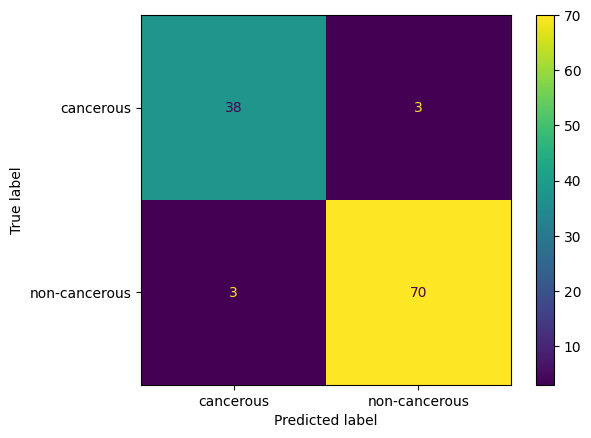

In [4]:
### YOU DO NOT NEED TO CHANGE THIS CODE BLOCK ###

x_train, x_test, y_train, y_test, linear_svc_model = run_model(x, y, test_size=0.2, shuffle=True, stratify=None, random_state=2541)

# Activity 1: Model evaluation metrics

- Answer the questions below on the confusion matrix that was outputted in Activity 0
- Use this source to help you https://www.datacamp.com/tutorial/what-is-a-confusion-matrix-in-machine-learning
- Use any other sources to help you, please includes them as references

## Q 1.1. How many...? Please complete the value column

Positive = cancerous

Negative = non-cancerous

### !!! ENTER YOUR ANSWER HERE FOR Q 1.1.

| Metric | Actual | Predicted | Value |
| ------ | ------ | --------- | ----- |
| True Positive (TP)  | + | + | 38 |
| True Negative (TN)  | - | - | 70 |
| False Positive (FP) | - | + | 3 |
| False Negative (FN) | + | - | 3 |

## Q 1.2. Calculate... Please complete the value column

These equations may help you:

![Model evaluation metrics](images/Model_evaluation_metrics.png)

### !!! ENTER YOUR ANSWER HERE FOR Q 1.2.

| Metric |  Value |
| ------ |  ----- |
| Accuracy    | 0.947 |
| Recall      | 0.927 |
| Precision   | 0.927 |
| Specificity | 0.959 |
| F1 Score    | 0.927

## Q 1.3. Which metric is the most appropriate to maximise for this use case? Why?

Choose one: Why?
- Accuracy
- Recall
- Precision 
- Specificity
- F1 Score

### !!! ENTER YOUR ANSWER HERE FOR Q 1.3.
F1 score is optimal due to the imbalance between the positive and negative classes, which if considering accuracy alone could lead to scenarios where a classifier that marked every cell as malignant would receive a high evaluation score

## Q 1.4. Choose one classification metric that we have not covered yet from this list

https://scikit-learn.org/stable/api/sklearn.metrics.html  e.g. hamming loss, roc_curve, auc or cohen_kappa_score

- How is the metric calculated?
- In what circumstances would we use this metric over the 5 metrics we have already looked at in Q 1.2.?

### !!! ENTER YOUR ANSWER HERE FOR Q 1.4.
For this example, specific attention must be given to the loss function associated with the application of the ML model.  The classification of cells as malignant or benign has potential to seriously impact the quality of life of patients, as a cancer diagnosis will likely lead to intense treatment regimens.  As a result, it is imperative that the false positive rate of the classifier is minimised in order to avoid unnecessary treatment/surgery.\

An alternative to the previous metrics is the Jaccard Index, which is defined as the ratio of the intersection to the union for the prediction and ground truth labels:
$J(A,B) = A intersection B / A union B$

The advantage of the Jaccard index over the previous metrics is that it takes into account the false positive rate during the calculation, in a similar manner to the F1 score mentioned previouslyh

# Activity 2: Train/test split

The parameters for scikit-learn's train/test split can be seen on the documentation https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
# x_train, x_test, y_train, y_test = train_test_split( # this function splits x and y data into 4 parts. The first two are where the features, or x, are split into train and test. The second two are where the targets, or y, are split into train and test.
#                                                     x, # this is the features data 
#                                                     y, # this is the target data
#                                                     test_size=0.2, # this is the percentage of data that will be sectioned off in the test set so the train set will have 80% of the data and the test set will have 20%
#                                                     shuffle = True, # this shuffles the data before splitting it
#                                                     stratify = None, # this is used to ensure that the data is split in a way that preserves the percentage of samples for each class
#                                                     random_state=chosen_random_state # this is the seed state or random state
#                                                     )

## Q 2.1. Run the code below and comment on what happens when random_state changes when shuffle=True

These sources may be helpful:

a) https://www.geeksforgeeks.org/pseudo-random-number-generator-prng/

b) https://www.geeksforgeeks.org/what-is-scikit-learn-random-state-in-splitting-dataset/

c) https://www.geeksforgeeks.org/how-to-split-the-dataset-with-scikit-learns-train_test_split-function/

### !!! ENTER YOUR ANSWER HERE FOR Q 2.1.

**Answer the following questions**:

- What happens to confusion matrices when the random_state changes?\
The confusion matricies return different values for TP, TN, FP and FN classifications

- Why?\
The random_state variable alters the inital conditions of the test:train split, resulting in slightly different data partitions

- What is best practice regarding random_state?\
Random state should always be set, and the value recorded to ensure reproduceability of classification results.


          test_size: 0.2
          shuffle: True
          stratify: None
          random_state: 2541
          


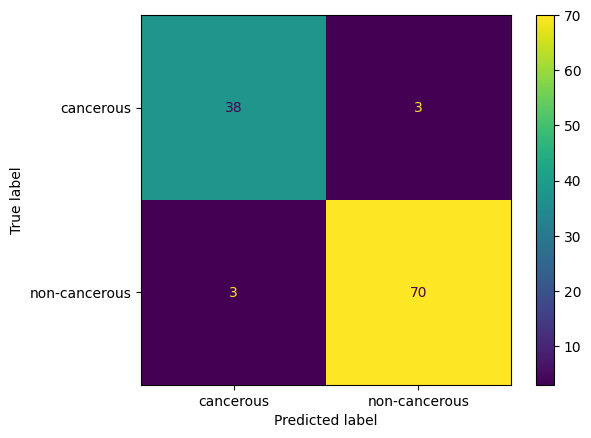


          test_size: 0.2
          shuffle: True
          stratify: None
          random_state: 600
          


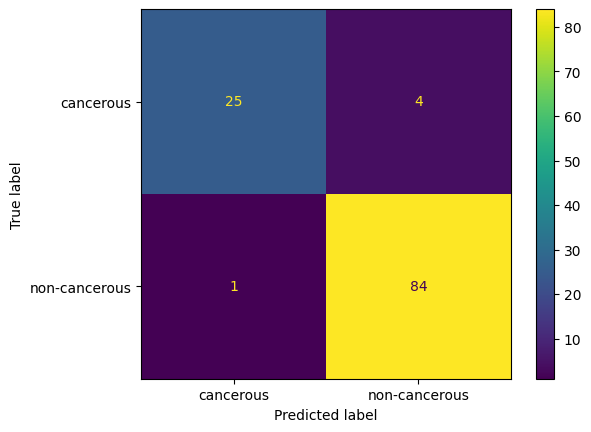


          test_size: 0.2
          shuffle: True
          stratify: None
          random_state: 999
          


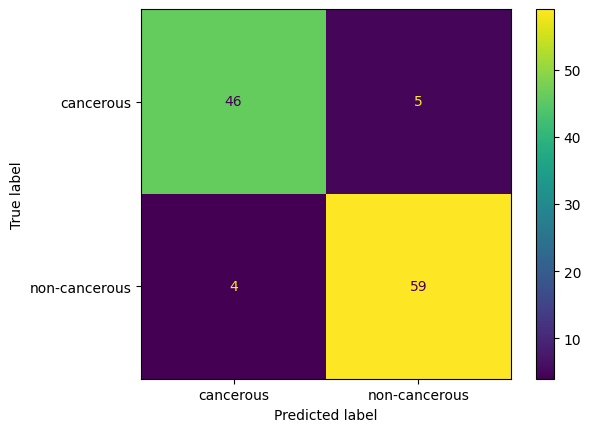

In [10]:
### Remove the hashes next to the code to run it

x_train, x_test, y_train, y_test, linear_svc_model = run_model(x, y, test_size=0.2, shuffle=True, stratify=None, random_state=2541)

x_train, x_test, y_train, y_test, linear_svc_model = run_model(x, y, test_size=0.2, shuffle=True, stratify=None, random_state=600)

x_train, x_test, y_train, y_test, linear_svc_model = run_model(x, y, test_size=0.2, shuffle=True, stratify=None, random_state=999)

## Q 2.2. Run the code below and comment on what happens when random_state changes when shuffle=False

### !!! ENTER YOUR ANSWER HERE FOR Q 2.2.

**Answer the following questions**:

- What happens to confusion matrices when the random_state changes?\
Confusion matricies remain the same

- Why?\
Because the shuffle parameter has been set to False, each instance of the model is training on the same partitions of data; because the models themselves have a predefined random state, the results generated are the same.


          test_size: 0.2
          shuffle: False
          stratify: None
          random_state: 2541
          


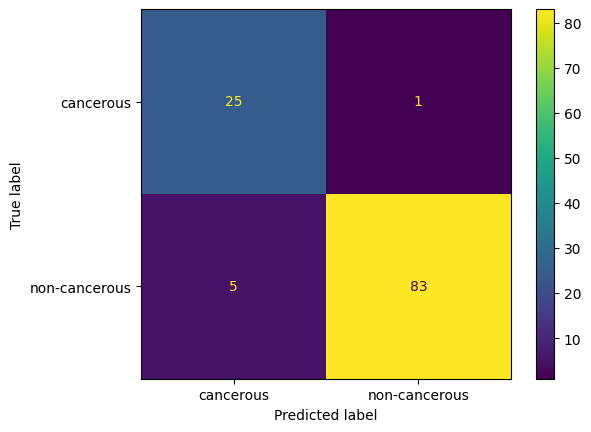


          test_size: 0.2
          shuffle: False
          stratify: None
          random_state: 600
          


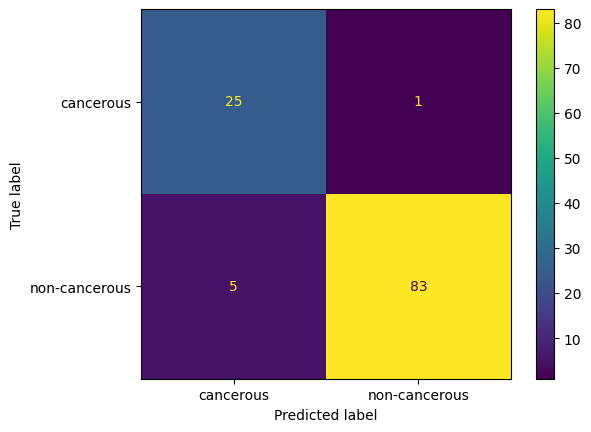


          test_size: 0.2
          shuffle: False
          stratify: None
          random_state: 999
          


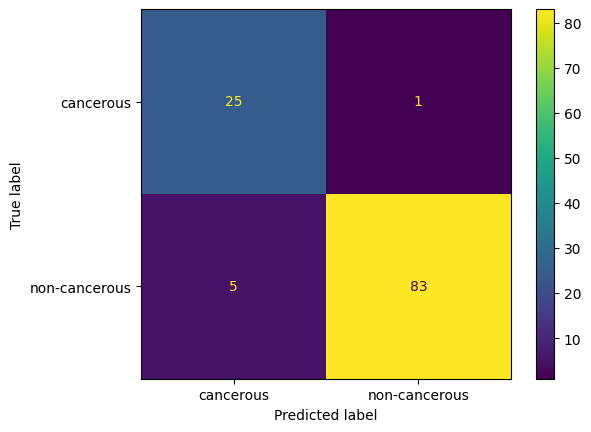

In [11]:
### Remove the hashes next to the code to run it

x_train, x_test, y_train, y_test, linear_svc_model = run_model(x, y, test_size=0.2, shuffle=False, stratify=None, random_state=2541)

x_train, x_test, y_train, y_test, linear_svc_model = run_model(x, y, test_size=0.2, shuffle=False, stratify=None, random_state=600)

x_train, x_test, y_train, y_test, linear_svc_model = run_model(x, y, test_size=0.2, shuffle=False, stratify=None, random_state=999)

## Q 2.3. Run the code below and comment on what happens when shuffle changes

This source may be helpful:

a) https://www.geeksforgeeks.org/how-to-split-the-dataset-with-scikit-learns-train_test_split-function/

### !!! ENTER YOUR ANSWER HERE FOR Q 2.3.

**Answer the following questions**:

- What happens to confusion matrices when shuffle changes?\
The confusion matricies show different results between the two states.

- Why?\
When shuffle=True the dataset is randomly shuffled prior to the train_test_split function setting up the partitions; when shuffle=False this does not occur. This 

- When is using shuffle a good idea?\
Always!!! But more specifically, classification data can be ordered by the class labels; shuffling the data beforehand reduces the risk of accidental class imbalance in the training/test partitions. One exception to this is time series data, where the randomly shuffling data will destroy any trend information.


          test_size: 0.2
          shuffle: True
          stratify: None
          random_state: 2541
          


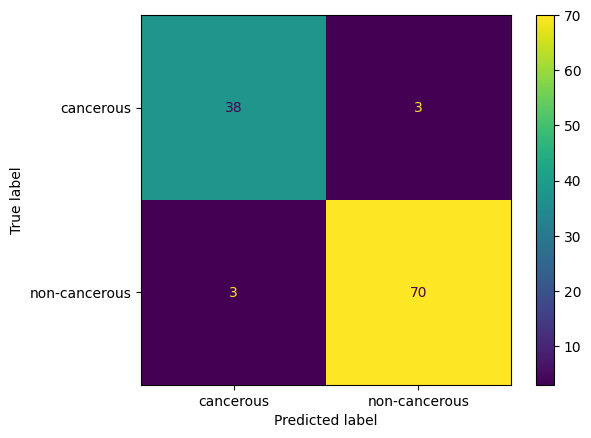


          test_size: 0.2
          shuffle: False
          stratify: None
          random_state: 2541
          


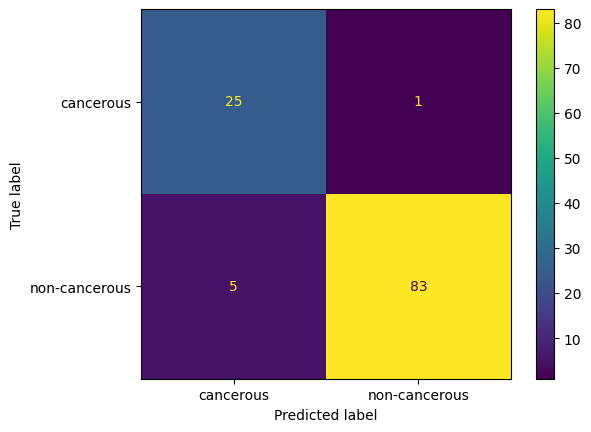

In [12]:
### Remove the hashes next to the code to run it

x_train, x_test, y_train, y_test, linear_svc_model = run_model(x, y, test_size=0.2, shuffle=True, stratify=None, random_state=2541)

x_train, x_test, y_train, y_test, linear_svc_model = run_model(x, y, test_size=0.2, shuffle=False, stratify=None, random_state=2541)

## Q 2.4. Run the code below and comment on what happens when stratify changes

This source may be helpful:

a) https://www.youtube.com/watch?v=Zcjl8xPLmPw (First 17 seconds)

b) https://www.cl.cam.ac.uk/teaching/2021/DataSciII/DSPNP3_QA_ML.pdf (first question)

### !!! ENTER YOUR ANSWER HERE FOR Q 2.4.

**Answer the following questions**:

- What happens to confusion matrices when stratify changes?\
The classification results change.

- Why?\
When stratify=True, test_train_split partitions the dataset to preserve the ratio of classifiers in the training and test sets.  This leads to different splits when stratify is True or False, thus changing the outcome of the model predictions despite all other parameters remaining the same.

- When is using stratification a good idea?\
Stratification is useful when the dataset in question has class imbalances; it reduces the risk of a split having a different class ratio than the base dataset, and is paired with the shuffle parameter explained in Q 2.3 in order to generate a stratified random sample.\
\
Stratification is essential for performing k-fold validation, as all k splits must maintain the same class ratio as the base dataset, if they are to be comparable.


          test_size: 0.2
          shuffle: True
          stratify: None
          random_state: 2541
          


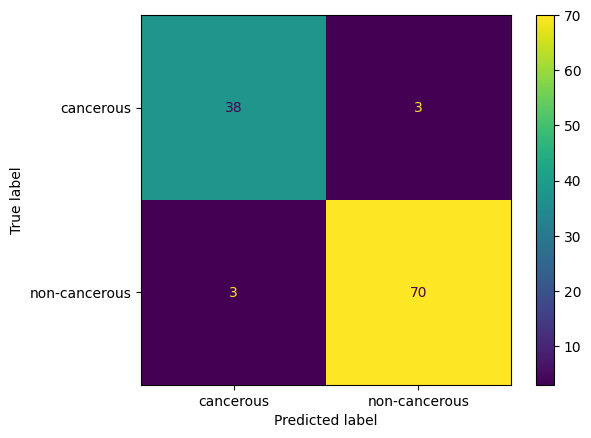


          test_size: 0.2
          shuffle: True
          stratify: stratified
          random_state: 2541
          


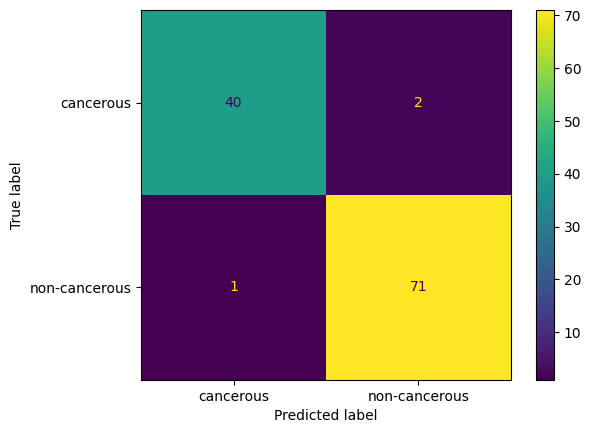

In [ ]:
### Remove the hashes next to the code to run it

x_train, x_test, y_train, y_test, linear_svc_model = run_model(x, y, test_size=0.2, shuffle=True, stratify=None, random_state=2541)

x_train, x_test, y_train, y_test, linear_svc_model = run_model(x, y, test_size=0.2, shuffle=True, stratify=y, random_state=2541)

# END OF FILE